In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
%matplotlib inline  

In [2]:
model = keras.models.load_model('best_model.h5')

## Q4 - A

In [51]:
pref = '../inaturalist_12K/'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    pref+'test',
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    seed = 42,
    shuffle = False)

Found 2000 images belonging to 10 classes.


In [52]:
np.random.seed(42)

In [53]:
pred = model.evaluate(test_generator,steps= test_generator.n/test_generator.batch_size)

125/125 [==============================] - 19s 152ms/step - loss: 1.8582 - accuracy: 0.3665


## Q4 - B

In [30]:
classes = list(test_generator.class_indices.keys())
classes

['Amphibia',
 'Animalia',
 'Arachnida',
 'Aves',
 'Fungi',
 'Insecta',
 'Mammalia',
 'Mollusca',
 'Plantae',
 'Reptilia']

In [105]:
test_imgs = []
test_path = pref+'test/'
labels = np.zeros((30,10))
cnt = 0
for i in range(10):
    lst = os.listdir(test_path+classes[i])
    idxs = np.random.choice(len(lst),3)
    for j in idxs:
        img = Image.open(test_path+classes[i]+'/'+lst[j])
        img = img.resize((224,224))
        test_imgs.append(np.asarray(img)*1./255)
        labels[cnt,i] = 1
        cnt+=1
        
test_imgs = np.array(test_imgs)

In [106]:
pred = np.argmax(model.predict(test_imgs),axis=1)

In [107]:
model.evaluate(test_imgs,labels)

1/1 [==============================] - 0s 672us/step - loss: 1.8561 - accuracy: 0.4000


[1.8561322689056396, 0.4000000059604645]

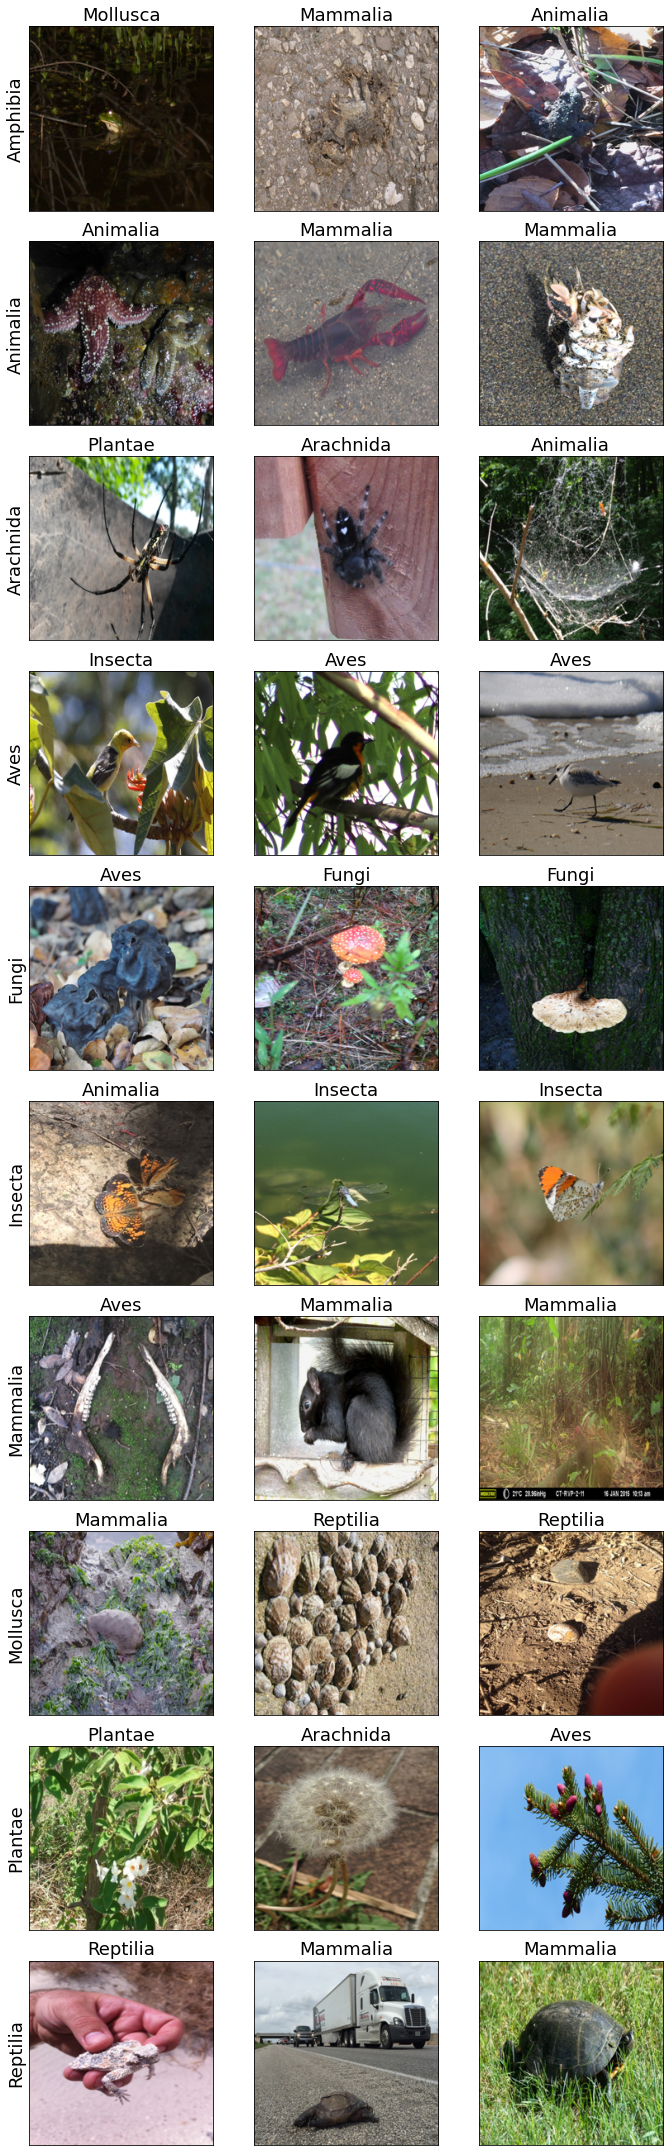

In [140]:
fig,ax = plt.subplots(10,3,sharex='col',sharey='row',figsize=(10,30))

plt.tick_params(axis='x',which='both',bottom=False,top=False)
for i in range(10):
    ax[i,0].set_ylabel(classes[i],rotation=90,fontsize=18)
    for j in range(3):
        ax[i,j].imshow(test_imgs[i*3+j])
        ax[i,j].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False,labelleft=False)
        ax[i,j].set_title(classes[pred[i*3+j]],fontsize=18)
        
fig.tight_layout()
plt.savefig('q4-2.png')

In [141]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      11648     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      100416    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      2

## Q4 - C

In [158]:
from keras import backend as K

layer_one_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
layer_output = layer_one_output(test_imgs)[0]

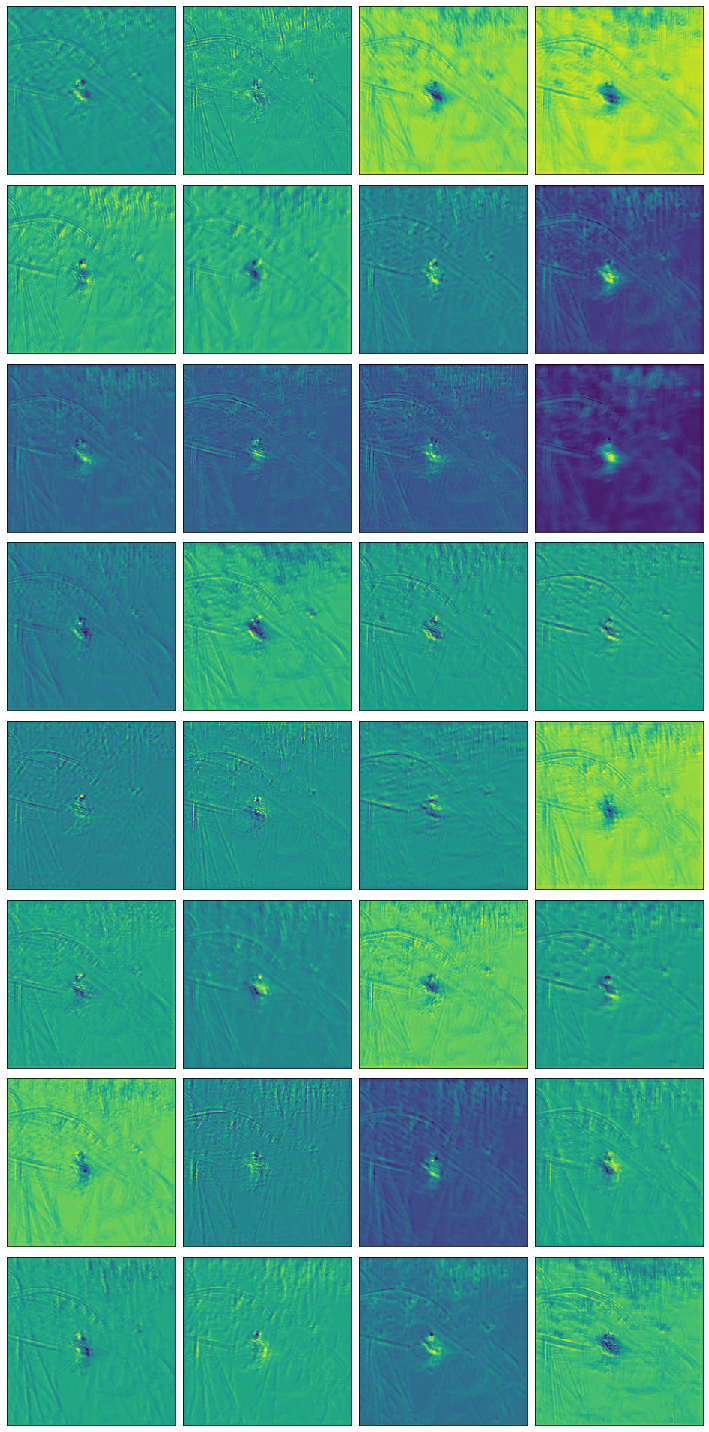

In [159]:
fig,ax = plt.subplots(8,4,figsize=(10,20))
plt.tick_params(axis='x',which='both',bottom=False,top=False)
for i in range(8):
    for j in range(4):
        ax[i,j].matshow(layer_output[0,:,:,i*4+j])
        ax[i,j].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False,labelleft=False,labeltop=False)
        
fig.tight_layout()
plt.savefig('q4-3-1-1.png')

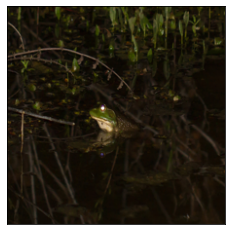

In [155]:
plt.imshow(test_imgs[0])
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False,labelleft=False,labeltop=False)
plt.savefig('q4-3-2.png')